<a href="https://colab.research.google.com/github/nishitpatell/RegressionAlgorithm/blob/main/LinearRegressionCaliforniaHousingDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [ ]:
import numpy as np
import pandas as pd
#house pricing dataset
from sklearn.datasets import fetch_california_housing

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = fetch_california_housing()

In [ ]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
pd.DataFrame(df.data)

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names
print(dataset.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [ ]:
dataset['Price'] = df.target

In [ ]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Dividing the dataset into independent and dependent features
X = dataset.iloc[:,:-1] # iloc[w.r.t. records, w.r.t. columns] #independent features
y = dataset.iloc[:,-1] # dependent features
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y.head()

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


## Pre Processing
##### You should get all zeros — this dataset is clean.

In [ ]:
print(dataset.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64


## Splitting into training ans testing sets

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns = 'Price') # Features, same step as we did earlier with iloc, this is just in different fashion
y = dataset['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# Why random_state=42? Ensures reproducibility — same data gets selected each time you run the notebook. In functions like train_test_split, it controls how the data is shuffled and split into training and testing sets. Using the same random_state guarantees the same split each time.


## Fitting Linear Regression Model

In [ ]:
## Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
## Examining Model Parameters
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)
#list(zip(X_train.columns, lr.coef_))
# Each coefficient tells how much the target variable (house price) will change with a 1-unit increase in that feature assuming all other features stay constant.
# For example, a high positive coefficient on MedInc means higher income → higher house value.

Intercept: -37.02327770606409
Coefficients: [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]


In [ ]:
# let's create a table
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})
print(coef_df)

      Feature  Coefficient
0      MedInc     0.448675
1    HouseAge     0.009724
2    AveRooms    -0.123323
3   AveBedrms     0.783145
4  Population    -0.000002
5    AveOccup    -0.003526
6    Latitude    -0.419792
7   Longitude    -0.433708


## Make Predictions

In [ ]:
y_pred = lr.predict(X_test) # These are the predicted prices for unseen data.

## Evaluate the Model
#### 🧠 R² tells us the proportion of variance in the target explained by the features.

#### 🧠 Adjusted R² penalizes unnecessary features. It decreases if you add features that don’t help.

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
print("R2 Score:", r2)

R2 Score: 0.5757877060324508


In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R2 Score:", adjusted_r2)

Adjusted R2 Score: 0.5749637928613558


## Residual Analysis

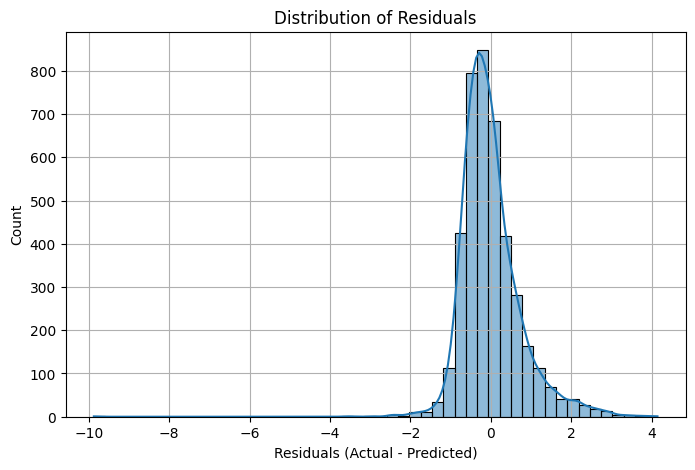

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.grid()

## Visualizing the Best-Fit Line in 2D (for Understanding)
#### Simple Visualization with One Feature (MedInc vs Price)

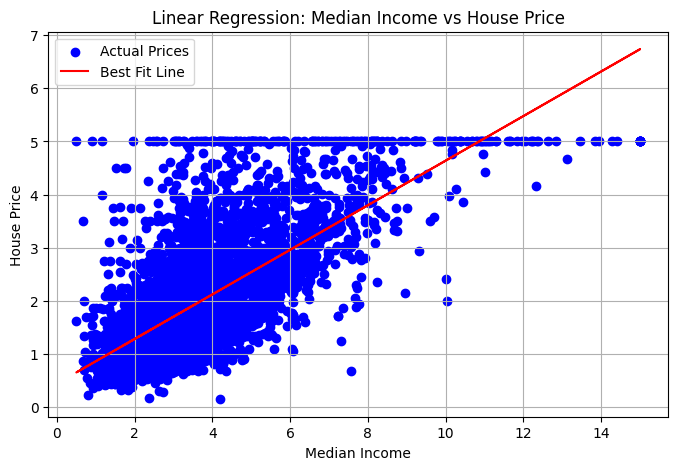

In [ ]:
# Use only one feature for this simple visual
from sklearn.linear_model import LinearRegression

# Reshape required because we're using just one feature
X_medinc = X_train[['MedInc']]
X_medinc_test = X_test[['MedInc']]

lr_simple = LinearRegression()
lr_simple.fit(X_medinc, y_train)

y_pred_medinc = lr_simple.predict(X_medinc_test)

# Plotting
plt.figure(figsize=(8,5))
plt.scatter(X_medinc_test, y_test, color='blue', label="Actual Prices")
plt.plot(X_medinc_test, y_pred_medinc, color='red', label="Best Fit Line")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.title("Linear Regression: Median Income vs House Price")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # number of test samples
p = X_test.shape[1]  # number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("R² Score:", r2)
print("Adjusted R² Score:", adjusted_r2)

R² Score: 0.5757877060324508
Adjusted R² Score: 0.5749637928613558


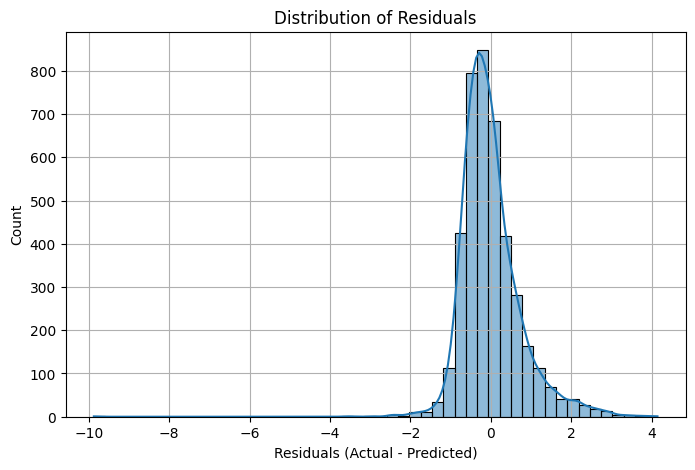

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.grid()

##### R2 and Adjusted R2 are very close which suggests that almost all features are useful. But if we look at features then we can clearly see that there should be only one column from the following: AveRooms and AveBedrms and AveOccup should be removed

## Lets Perfrom Manual feature selections and in the next file we'll use ridge and lasso regression

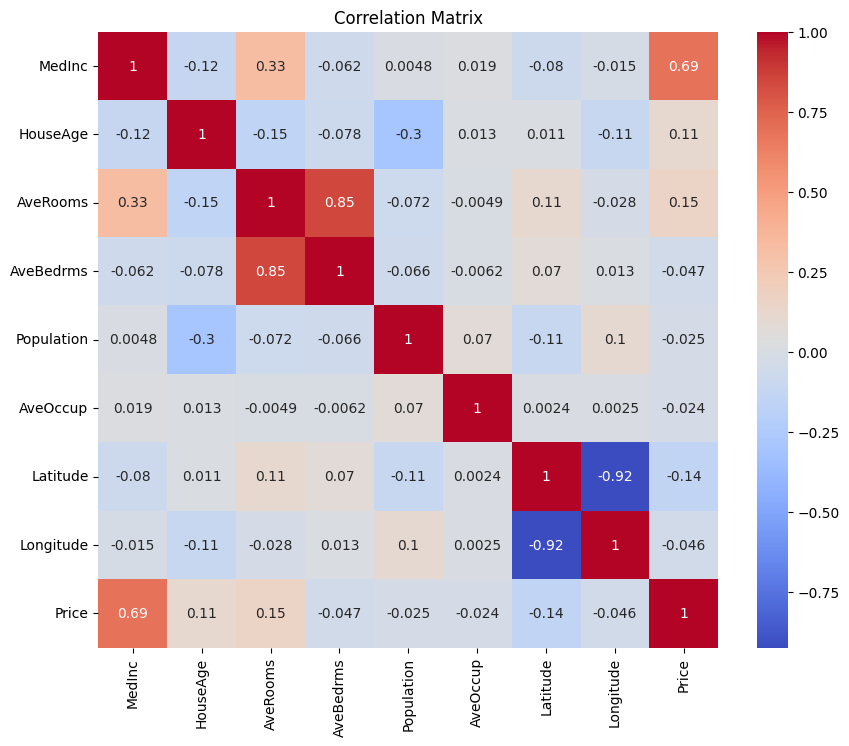

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

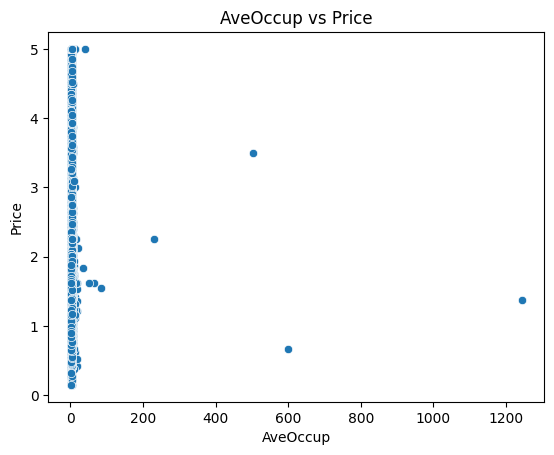

In [ ]:
# Scatter plot to check non-linear/noisy relationships
sns.scatterplot(x = dataset['AveOccup'], y = dataset['Price'])
plt.title('AveOccup vs Price')
plt.show()

## So, based on the above two scatter plot we will remove aveoccupancy column and for AveRooms & AveBedrms, we'll drop both and create Room_to_Bedroom_Ratio

In [ ]:
newDataSet = dataset

In [ ]:
newDataSet['Room_to_Bedroom_Ratio'] = newDataSet['AveRooms'] / newDataSet['AveBedrms']
#This ratio often reflects house luxury level — more rooms per bedroom = more living space, dining rooms, etc.
newDataSet.drop(['AveRooms', 'AveBedrms'], axis = 1, inplace = True)
newDataSet.head()

,MedInc,HouseAge,Population,AveOccup,Latitude,Longitude,Price,Room_to_Bedroom_Ratio
0,8.3252,41.0,322.0,2.555556,37.88,-122.23,4.526,6.821705
1,8.3014,21.0,2401.0,2.109842,37.86,-122.22,3.585,6.418626
2,7.2574,52.0,496.0,2.802260,37.85,-122.24,3.521,7.721053
3,5.6431,52.0,558.0,2.547945,37.85,-122.25,3.413,5.421277
4,3.8462,52.0,565.0,2.181467,37.85,-122.25,3.422,5.810714


In [ ]:
from sklearn.model_selection import train_test_split
X_new = newDataSet.drop(columns = 'Price')
y_new = newDataSet['Price']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_new = LinearRegression()
lr_new.fit(X_train_new,y_train_new)

LinearRegression()

In [ ]:
print("Intercept:", lr_new.intercept_)
print("Coefficients:", lr_new.coef_)

Intercept: -32.61143139242318
Coefficients: [ 4.82533062e-01  9.10092905e-03 -1.13142492e-05 -3.72507314e-03
 -3.76359493e-01 -3.92982483e-01 -2.00629193e-01]


In [ ]:
# let's create a table
new_coef_df = pd.DataFrame({
    'Feature': X_new.columns,
    'Coefficient': lr_new.coef_
})
print(new_coef_df)

                 Feature  Coefficient
0                 MedInc     0.482533
1               HouseAge     0.009101
2             Population    -0.000011
3               AveOccup    -0.003725
4               Latitude    -0.376359
5              Longitude    -0.392982
6  Room_to_Bedroom_Ratio    -0.200629


## Prediction

In [ ]:
y_pred_new = lr_new.predict(X_test_new) # These are the predicted prices for unseen data.

## Evaluation

In [ ]:
from sklearn.metrics import r2_score

new_r2 = r2_score(y_test_new,y_pred_new)
print("R2 Score:", new_r2)

R2 Score: 0.5927813155935231


In [ ]:
n = X_test_new.shape[0]
p = X_test_new.shape[1]

adjusted_r2 = 1-(1-new_r2)*(n-1)/(n-p-1)
print("Adjusted R2 Score:", adjusted_r2)

Adjusted R2 Score: 0.5920894391879781


## Residual Analysis

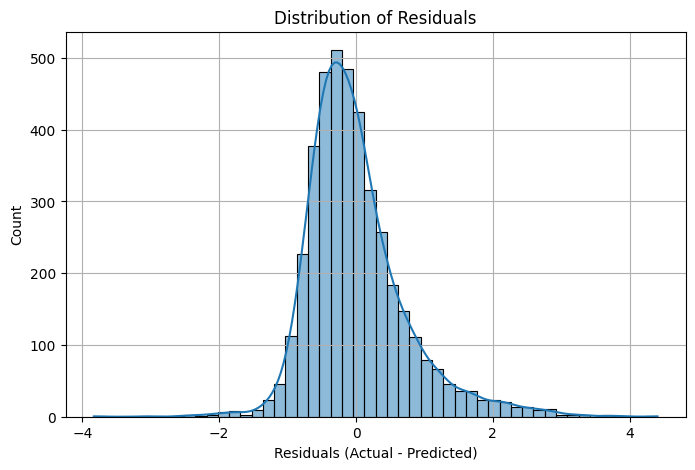

In [ ]:
residuals = y_test_new - y_pred_new

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.grid()